## Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from joblib import dump

## Loading Data

In [2]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
df1 = pd.DataFrame(data['data'], columns=data.feature_names)
df2 = pd.Series(data.target, name='Class')
df2.value_counts()

1    357
0    212
Name: Class, dtype: int64

In [6]:
df = pd.concat([df1, df2], axis=1)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  Class  
0          0.4601                  0.11890      0  
1          0.2750                  0.08902      0  
2          0.3613                  0.08758      0  
3          0.6638                  0.17300      0  
4          0.2364                  0.07678      0  

[5 rows x 31 columns]

In [7]:
z = df1.copy().values
pca = PCA(n_components=2)
pc = pca.fit_transform(z)
pcdf = pd.DataFrame(pc, columns=['1', '2'])
pcdf = pd.concat([pcdf, df2], axis = 1)
pcdf.head()

1           2  Class
0  1160.142574 -293.917544      0
1  1269.122443   15.630182      0
2   995.793889   39.156743      0
3  -407.180803  -67.380320      0
4   930.341180  189.340742      0

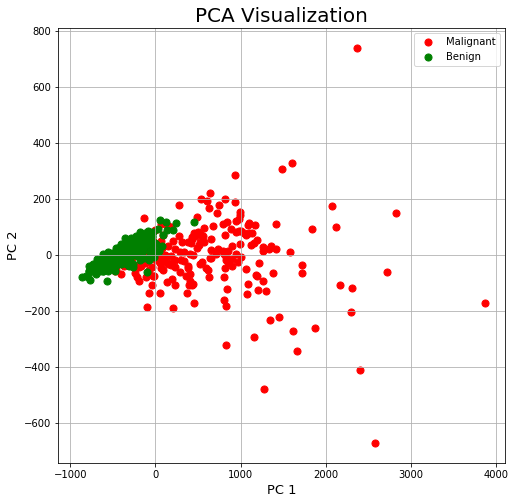

In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1', fontsize=13)
ax.set_ylabel('PC 2', fontsize=13)
ax.set_title('PCA Visualization', fontsize=20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    index = pcdf['Class'] == target
    ax.scatter(pcdf.loc[index, '1'], pcdf.loc[index, '2'], c = color, s = 50)
ax.legend(['Malignant', 'Benign'])
ax.grid()

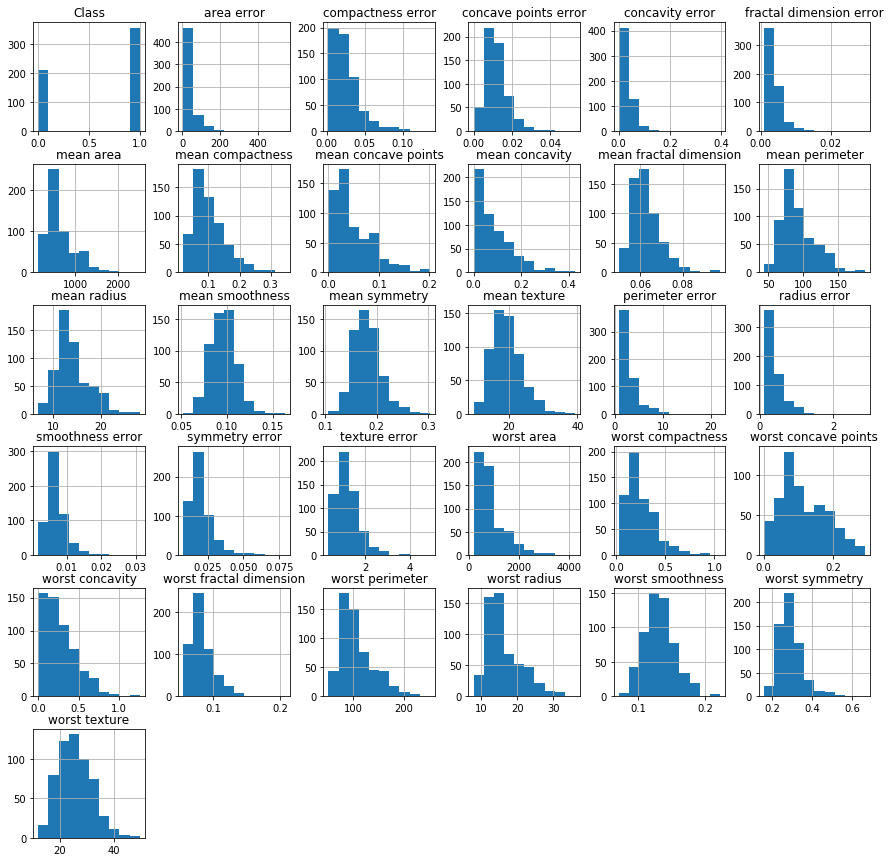

In [9]:
df.hist(figsize=(15,15))
plt.show()

## Finding Correlation

In [10]:
cor = df.corr()
corr = abs(cor['Class'])
imp = corr[corr > 0.5]
imp

mean radius             0.730029
mean perimeter          0.742636
mean area               0.708984
mean compactness        0.596534
mean concavity          0.696360
mean concave points     0.776614
radius error            0.567134
perimeter error         0.556141
area error              0.548236
worst radius            0.776454
worst perimeter         0.782914
worst area              0.733825
worst compactness       0.590998
worst concavity         0.659610
worst concave points    0.793566
Class                   1.000000
Name: Class, dtype: float64

## Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, stratify=data.target)

## Model Performaces

In [12]:
models = [LogisticRegression(solver='liblinear', multi_class='auto', class_weight='balanced', random_state=42),
         RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42), 
         SVC(kernel='linear', gamma='auto', class_weight='balanced'),
         GradientBoostingClassifier(), DecisionTreeClassifier(class_weight='balanced', random_state=42)]

classifiers = ['Logistic Reg', 'Random Forest', 'Linear_SVC', 'Gradient Boosting', 'Decision Tree']

for (model, name) in zip(models, classifiers):
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    errors = (y_pred != y_test).sum()
    cv = cross_val_score(model, df1, df2, cv=5, scoring='accuracy')
    print('{}: '.format(name))
    print('CV Mean: {}'.format(np.mean(cv)))
    print('Errors: {}'.format(errors))
    print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
    print('ROC_AUC_Score: {}'.format(roc_auc_score(y_test, y_pred)))
    print('Confusion Matrix: \n {}'.format(confusion_matrix(y_test, y_pred)))
    print('Classification Report: \n {} \n\n'.format(classification_report(y_test, y_pred)))

Logistic Reg: 
CV Mean: 0.9526125432858793
Errors: 5
Accuracy Score: 0.965034965034965
ROC_AUC_Score: 0.9644654088050315
Confusion Matrix: 
 [[51  2]
 [ 3 87]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143
 


Random Forest: 
CV Mean: 0.9596921893035782
Errors: 5
Accuracy Score: 0.965034965034965
ROC_AUC_Score: 0.9528301886792453
Confusion Matrix: 
 [[48  5]
 [ 0 90]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95        53
           1       0.95      1.00      0.97        90

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97    

## Model Performances with Scaling and Dimensionality Reduction

In [13]:
models = [LogisticRegression(solver='liblinear', multi_class='auto', class_weight='balanced', random_state=42),
         RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42), 
         SVC(kernel='linear', gamma='auto', class_weight='balanced'),
         GradientBoostingClassifier(), DecisionTreeClassifier(class_weight='balanced', random_state=42)]

classifiers = ['Logistic Reg', 'Random Forest', 'Linear_SVC', 'Gradient Boosting', 'Decision Tree']

for (model, name) in zip(models, classifiers):
    model = model
    scaler = StandardScaler()
    pca = PCA(.95)
    pipeline = make_pipeline(scaler, pca, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    errors = (y_pred != y_test).sum()
    cv = cross_val_score(pipeline, df1, df2, cv=5, scoring='accuracy')
    print('{}: '.format(name))
    print('CV Mean: {}'.format(np.mean(cv)))
    print('Errors: {}'.format(errors))
    print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))
    print('ROC_AUC_Score: {}'.format(roc_auc_score(y_test, y_pred)))
    print('Confusion Matrix: \n {}'.format(confusion_matrix(y_test, y_pred)))
    print('Classification Report: \n {} \n\n'.format(classification_report(y_test, y_pred)))

Logistic Reg: 
CV Mean: 0.9771758368603308
Errors: 2
Accuracy Score: 0.986013986013986
ROC_AUC_Score: 0.9888888888888889
Confusion Matrix: 
 [[53  0]
 [ 2 88]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       1.00      0.98      0.99        90

    accuracy                           0.99       143
   macro avg       0.98      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143
 


Random Forest: 
CV Mean: 0.9491035013466718
Errors: 7
Accuracy Score: 0.951048951048951
ROC_AUC_Score: 0.9378406708595388
Confusion Matrix: 
 [[47  6]
 [ 1 89]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.89      0.93        53
           1       0.94      0.99      0.96        90

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95    

## Choosing Linear SVC

In [14]:
scaler = StandardScaler()
pca = PCA(.95)
model = SVC(kernel='linear', gamma='auto', class_weight='balanced')
pipeline = make_pipeline(scaler, pca, model)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print('Accuracy:',accuracy_score(y_test, y_pred))
print('Errors:', (y_pred != y_test).sum())

Accuracy: 0.986013986013986
Errors: 2


## Finalizing and Saving the Model

In [15]:
final = make_pipeline(scaler, pca, model)
final.fit(df1, df2)
dump(final, 'Cancer Tumor Detection Model.pkl')

['Cancer Tumor Detection Model.pkl']